In [6]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [3]:
pip install gensim

  Created wheel for smart-open: filename=smart_open-2.1.0-cp37-none-any.whl size=110325 sha256=21cc5c8403760464ea8b744f7d881447436e9a6d14afdb3f3b60da0232b757d4
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\25\6c\db\7dcb26f19fb260c5629af85ed1c8ef9641143444fc7ec1fa08
  Created wheel for boto3: filename=boto3-1.14.48-py2.py3-none-any.whl size=127855 sha256=753db6eb7a0adee95e8e06a5aa6fc92fbdf8871996ae4acfb5e972f734e85da9
  Stored in directory: C:\Users\Admin\AppData\Local\pip\Cache\wheels\5a\8b\e0\96a564beb67f86e54a15096020c3bfc955f464fe633373e242
Successfully built smart-open boto3
  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13
Note: you may need to restart the kernel to use updated packages.


In [8]:
paragraph = """The agriculture sector employs nearly half of the workforce in the country. However, it contributes to 17.5% of the GDP (at current prices in 2015-16). 
 
Over the past few decades, the manufacturing and services sectors have increasingly contributed to the growth of the economy, while the agriculture sector’s contribution has decreased from more than 50% of GDP in the 1950s to 15.4% in 2015-16 (at constant prices).
 
India’s production of food grains has been increasing every year, and India is among the top producers of several crops such as wheat, rice, pulses, sugarcane and cotton. 
It is the highest producer of milk and second highest producer of fruits and vegetables.  
In 2013, India contributed 25% to the world’s pulses production, the highest for any one country, 22% to the rice production and 13% to the wheat production. 
It also accounted for about 25% of the total quantity of cotton produced, besides being the second highest exporter of cotton for the past several years. 
However, the agricultural yield (quantity of a crop produced per unit of land) is found to be lower in the case of most crops, as compared to other top producing countries such as China, Brazil and the United States.

·   Although India ranks third in the production of rice, its yield is lower than Brazil, China and the United States. 
The same trend is observed for pulses, where it is the second highest producer.  
Key issues affecting agricultural productivity include the decreasing sizes of agricultural land holdings, continued dependence on the monsoon, inadequate access to irrigation, imbalanced use of soil nutrients resulting in loss of fertility of soil, 
uneven access to modern technology in different parts of the country, lack of access to formal agricultural credit, limited procurement of food grains by government agencies, and failure to provide remunerative prices to farmers.
Some of the recommendations made by committees and expert bodies over the years include bringing in agricultural land leasing laws, shifting to micro-irrigation techniques to improve efficiency of water use, improving access to quality seeds by engaging with the private sector,
and introducing a national agricultural market to allow the trading of agricultural produce online.
Agricultural productivity depends on several factors.  These include the availability and quality of agricultural inputs such as land, water, seeds and fertilizers, access to agricultural credit and crop insurance, assurance of remunerative prices for agricultural produce, 
and storage and marketing infrastructure, among others.  This report provides an overview of the state of agriculture in India.  It discusses factors related to the production and post-harvest activities in agriculture. 

As of 2009-10, more than half of the total workforce (53%) of the country, i.e. 243 million persons were employed in agriculture.[1]  The share of population depending on agriculture for its livelihood consists of landowners, tenant farmers who cultivate a piece of land,
and agricultural labourers who are employed on these farms.  Agricultural output has been volatile over the past 10 years, with annual growth ranging from 8.6% in 2010-11, to -0.2% in 2014-15 and 0.8% in 2015-16.
Besides providing for the livelihood of farmers and labourers, the agricultural sector also addresses food security for the nation.  The Food and Agricultural Organisation (FAO) of the United Nations defines food security as a situation where all people have, at all times,
physical and economic access to sufficient, safe and nutritious food that meets the dietary needs and food preferences for a healthy and active life.
Despite high levels of production in the country, 15% of the population continues to be under-nourished, as per 2014 estimates.[11],[12] 

India enacted the National Food Security Act in 2013.  
The 2013 Act aims to provide food and nutritional security to people by ensuring access to adequate amount of quality food at affordable prices.[13]  Under the 2013 Act, persons belonging to certain categories are provided with food grains (wheat, rice and coarse cereals) at subsidised prices.  
As of 2015, 68% of the population, i.e. 81 crore persons (of which 77% are in rural areas and 23% in urban areas) are covered under the Act.[14] 

Over the past few decades, with increasing per capita income and access to a variety of food groups, the consumption pattern of food in the country has been changing.  Dependence on cereals for nutrition has decreased and the consumption of protein has increased.[15]  Sources of protein include pulses, meat, seafood, and eggs, among others.  
According to a Finance Ministry report on incentivising the production of pulses in the country, poor levels of nutrition suggest that increasing the consumption of proteins should be the policy priority for the government.[16]  The report estimates that the cost of pulses as a source of protein is lower than other sources.  Under the current domestic scenario,
India is facing a shortage of pulses which is being plugged by imports.""" 

In [9]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [12]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['the agriculture sector employs nearly half of the workforce in the country.',
 'however, it contributes to .',
 '% of the gdp (at current prices in - ).',
 'over the past few decades, the manufacturing and services sectors have increasingly contributed to the growth of the economy, while the agriculture sector’s contribution has decreased from more than % of gdp in the s to .',
 '% in - (at constant prices).',
 'india’s production of food grains has been increasing every year, and india is among the top producers of several crops such as wheat, rice, pulses, sugarcane and cotton.',
 'it is the highest producer of milk and second highest producer of fruits and vegetables.',
 'in , india contributed % to the world’s pulses production, the highest for any one country, % to the rice production and % to the wheat production.',
 'it also accounted for about % of the total quantity of cotton produced, besides being the second highest exporter of cotton for the past several years.',
 'howeve

In [11]:
 import nltk
 nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [13]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [14]:
sent_word

[['the',
  'agriculture',
  'sector',
  'employs',
  'nearly',
  'half',
  'of',
  'the',
  'workforce',
  'in',
  'the',
  'country',
  '.'],
 ['however', ',', 'it', 'contributes', 'to', '.'],
 ['%',
  'of',
  'the',
  'gdp',
  '(',
  'at',
  'current',
  'prices',
  'in',
  '-',
  ')',
  '.'],
 ['over',
  'the',
  'past',
  'few',
  'decades',
  ',',
  'the',
  'manufacturing',
  'and',
  'services',
  'sectors',
  'have',
  'increasingly',
  'contributed',
  'to',
  'the',
  'growth',
  'of',
  'the',
  'economy',
  ',',
  'while',
  'the',
  'agriculture',
  'sector',
  '’',
  's',
  'contribution',
  'has',
  'decreased',
  'from',
  'more',
  'than',
  '%',
  'of',
  'gdp',
  'in',
  'the',
  's',
  'to',
  '.'],
 ['%', 'in', '-', '(', 'at', 'constant', 'prices', ')', '.'],
 ['india',
  '’',
  's',
  'production',
  'of',
  'food',
  'grains',
  'has',
  'been',
  'increasing',
  'every',
  'year',
  ',',
  'and',
  'india',
  'is',
  'among',
  'the',
  'top',
  'producers',
  '

In [15]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [16]:
sent_word

[['agriculture',
  'sector',
  'employs',
  'nearly',
  'half',
  'workforce',
  'country',
  '.'],
 ['however', ',', 'contributes', '.'],
 ['%', 'gdp', '(', 'current', 'prices', '-', ')', '.'],
 ['past',
  'decades',
  ',',
  'manufacturing',
  'services',
  'sectors',
  'increasingly',
  'contributed',
  'growth',
  'economy',
  ',',
  'agriculture',
  'sector',
  '’',
  'contribution',
  'decreased',
  '%',
  'gdp',
  '.'],
 ['%', '-', '(', 'constant', 'prices', ')', '.'],
 ['india',
  '’',
  'production',
  'food',
  'grains',
  'increasing',
  'every',
  'year',
  ',',
  'india',
  'among',
  'top',
  'producers',
  'several',
  'crops',
  'wheat',
  ',',
  'rice',
  ',',
  'pulses',
  ',',
  'sugarcane',
  'cotton',
  '.'],
 ['highest',
  'producer',
  'milk',
  'second',
  'highest',
  'producer',
  'fruits',
  'vegetables',
  '.'],
 [',',
  'india',
  'contributed',
  '%',
  'world',
  '’',
  'pulses',
  'production',
  ',',
  'highest',
  'one',
  'country',
  ',',
  '%',
  'r

In [17]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [20]:
# Test the word vectors
vector = model.wv['workforce']

print(vector)

[ 3.8556189e-03  1.7188527e-03  1.7595683e-03 -1.7221952e-03
  1.3353660e-03 -1.9057752e-03 -1.7309585e-03 -2.6114169e-03
  1.8830874e-03  3.8120102e-03 -4.1628140e-03  1.3611312e-03
  3.1737678e-03 -8.4967556e-04 -3.7188523e-03 -4.1809510e-03
  4.6610525e-03 -4.3807249e-03 -1.0992219e-03 -1.0223142e-03
  3.3468024e-03  3.1698765e-03  3.7597043e-03  1.7527025e-03
  8.7052817e-04 -2.8133749e-03 -3.8914618e-03  9.2598912e-04
 -1.6820723e-03  3.7704168e-03 -4.7670254e-03 -2.4280103e-03
 -1.1980499e-03  2.4906932e-03 -4.4165277e-03 -1.6811583e-03
  3.2914302e-03 -2.3467604e-03 -3.6963150e-03  2.8521349e-03
  6.3673942e-04 -4.0807719e-03  1.9809469e-05  8.2604418e-04
  1.4122014e-03  3.7825231e-03  1.0772870e-03  4.3258036e-04
 -3.0773906e-03 -8.7281992e-04  2.9503889e-03 -2.6821666e-03
  2.3446463e-03  4.0110899e-04 -1.1181777e-04  1.6870575e-03
 -3.3917334e-03  2.4197805e-03 -3.9120266e-04 -4.0948079e-03
 -3.5851594e-04  1.5766171e-03  2.5596021e-04 -1.1367862e-03
  3.9761448e-03  3.94915

In [22]:
# Most similar words
similar = model.wv.most_similar('employs',topn=5)

similar

[('nutritional', 0.2767283618450165),
 ('compared', 0.25311845541000366),
 ('%', 0.24233606457710266),
 ('soil', 0.23947060108184814),
 ('state', 0.21785728633403778)]

In [25]:
# You can also check words similarity and compare above
model.wv.similarity(w1='decades',w2='workforce')

-0.097657554

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


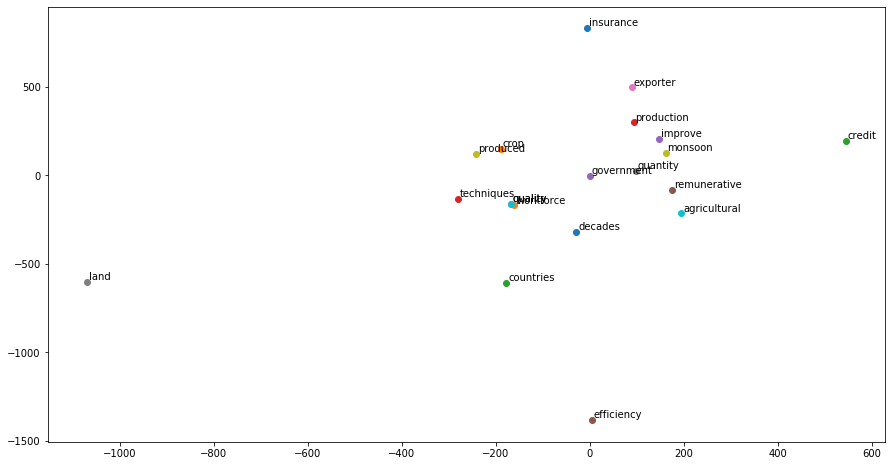

In [27]:
from sklearn.manifold import  TSNE
vocab = ['decades','workforce','countries','production','government','remunerative','exporter','quantity','produced','agricultural',
         'insurance','crop','credit', 'techniques','improve','efficiency','quality','land','monsoon','quality']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)